<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/Food_Demand_Forecasting_Mukul_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

Help a food delivery business in forecasting the food demand for the upcoming weeks so that we can plan the stock of raw materials. A perfect challenge to test your time series knowledge.

About Food Demand Forecasting Challenge
Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately forecast daily and weekly demand.
 
Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a real dataset.

Problem Statement

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

# Hypothesis of Food Demand Forecasting

1) Number of Orders

2) Location

3) Price

4) Type Of Food

5) Discount/Offers

6) Time of the Day

7) Delivery Time

8) Day

9) Weather

10) Number of Delivery Folks

11) Quality of Food

12) Raw Materials

13) Previous Record

14) Reviews

15) Storage Area

16) Outlets/Warehouse

In [0]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/train.csv')

In [0]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/test_QoiMO9B.csv')

In [0]:
centre=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/fulfilment_center_info.csv')

In [0]:
meal=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/meal_info.csv')


In [9]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [10]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [0]:
# Merge all the dataframes into train datast

train=pd.merge(train,meal,on='meal_id')

In [0]:
train=pd.merge(train,centre,on='center_id')

In [13]:
train.columns  # nUmber of orders is the target

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [0]:

test=pd.merge(test,meal,on='meal_id')

In [0]:
test=pd.merge(test,centre,on='center_id')

In [16]:
train.shape


(456548, 15)

In [17]:
test.shape

(32573, 14)

# Univariate Analysis

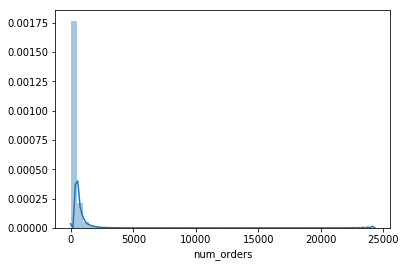

In [18]:
# Number of orders

sns.distplot(train.num_orders)

# Observations:Num_Orders

The number of orders varibale is highly skewed in nature. This means that the company gets orders of the small magnitude. ranging from minimum 13 to 24299 pieces with a mean order size of261 units and median of 136 units.


In [19]:
train.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

<Figure size 432x288 with 0 Axes>

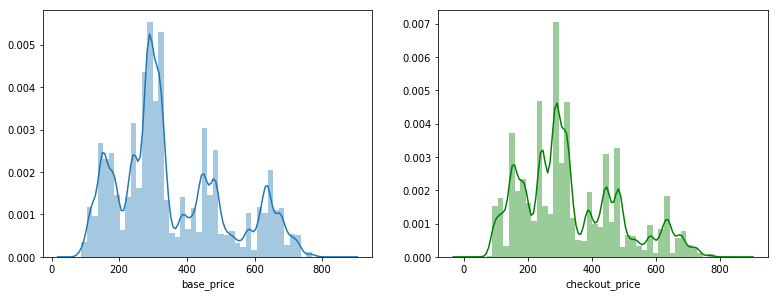

In [20]:
# Base Price and Checkout Price
plt.figure(1)
plt.figure(figsize=[13,10])

plt.subplot(221)
sns.distplot(train.base_price)


plt.subplot(222)
sns.distplot(train.checkout_price,color='green')
plt.show()

<Figure size 432x288 with 0 Axes>

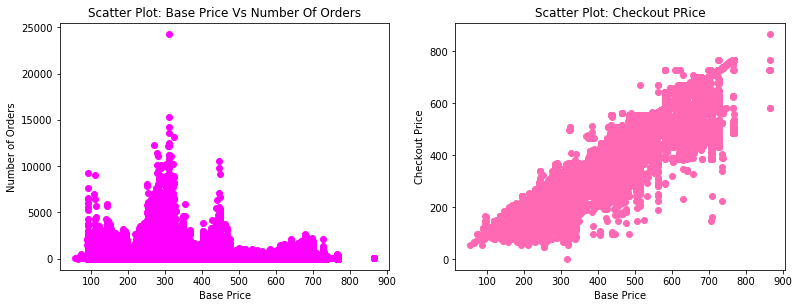

In [21]:
plt.figure(1)
plt.figure(figsize=[13,10])

plt.subplot(221)
plt.scatter(train.base_price,train.num_orders,color='magenta')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.title('Scatter Plot: Base Price Vs Number Of Orders')

plt.subplot(222)
plt.scatter(train.base_price,train.checkout_price,color='hotpink')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.title('Scatter Plot: Checkout PRice')
plt.show()

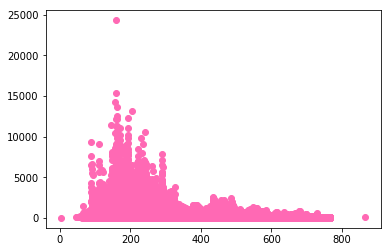

In [22]:
plt.scatter(train.checkout_price,train.num_orders,color='hotpink')

# Observations:  Base Price Vs Number Of Orders

1) The prices have different patterns which are showing up at Rs 100 and then btween 200 and 400. Having said that, there is one data point focussing on the price of Rs 850 and more.

# Observations: Base Price Vs Checkout Price

1) A linear patter of prices is showing up which means that the base price and checkout price are largely related. It also shows that the base price is greater than the checkout price.

2) The co-realtion between the base price and the checkout price is 95%

# Observations:  Checkout Price Vs Number Of Orders

1) WE can see that there is one order at 0 price and one order of Rs 300 approx with a demand of 24000 items

In [23]:
train[['base_price','checkout_price']].corr() # 0.95

,base_price,checkout_price
base_price,1.000000,0.953389
checkout_price,0.953389,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

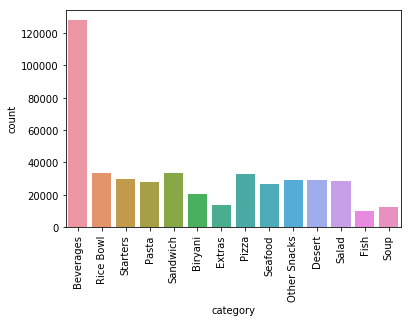

In [24]:
# Category
sns.countplot(train.category)
plt.xticks(rotation=90)

In [25]:
train.category.value_counts()[0:5]

Beverages    127890
Rice Bowl     33408
Sandwich      33291
Pizza         33138
Starters      29941
Name: category, dtype: int64

In [26]:
train.category.value_counts()[0:5]

Beverages    127890
Rice Bowl     33408
Sandwich      33291
Pizza         33138
Starters      29941
Name: category, dtype: int64

# Observations: Category

The top 5 selling products are :-

1) Beverages

2) Rice Bowl

3) Sandwich

4) Pizza

5) Starters

Actionables:

1) Find out the Demand of these 5 products and demand of the others and see the percentage wise. Here we see that our top 5 products contribute 56%of the data


In [27]:
train.category.value_counts(normalize=True)[0:5]

Beverages    0.280124
Rice Bowl    0.073175
Sandwich     0.072919
Pizza        0.072584
Starters     0.065581
Name: category, dtype: float64

In [28]:
train.category.value_counts(normalize=True)[0:5].sum()*100

56.438315357859416

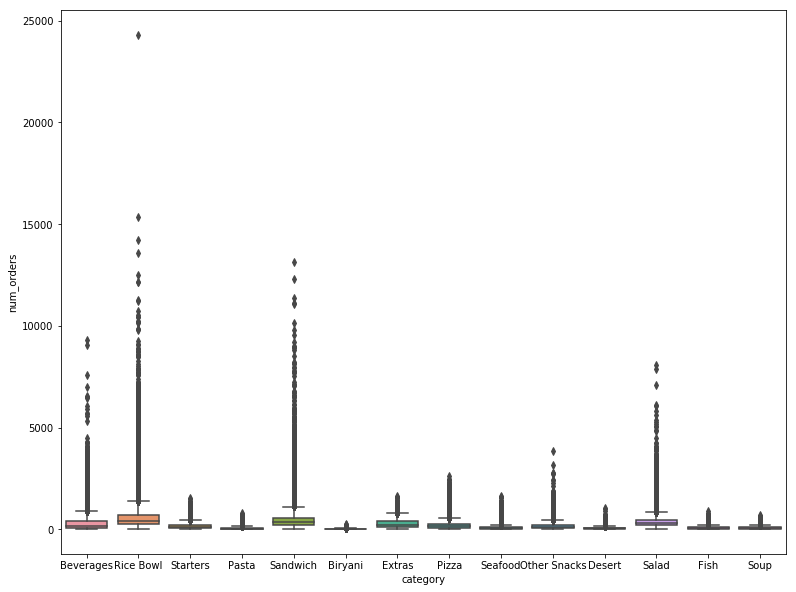

In [29]:
# Boxplot
plt.figure(figsize=[13,10])
sns.boxplot(x=train.category, y=train.num_orders)
plt.show()

# Observations: Category vs Number of Orders

1)  Huge Demand is visible in beverages, rice bowl, sandwiches and salad

2) Outlier is identified in Rice Bowl wherein the order size is of 25000

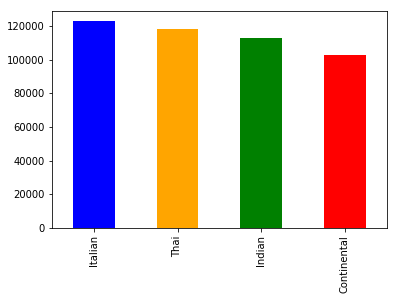

In [30]:
# Cuisine categorical variable

train.cuisine.value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

In [31]:


train.cuisine.value_counts(normalize=True)

Italian        0.269249
Thai           0.258934
Indian         0.246660
Continental    0.225157
Name: cuisine, dtype: float64

# Observations: Cuisine

The most demanded cuisine is the Italian then Thai then Indian and last is Continental

The percentages are as 27%,26%,25% adn 23% respectively

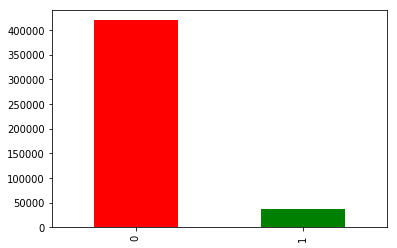

In [32]:
# Email Promotion 
# Promotion increases orders

train.emailer_for_promotion.value_counts().plot(kind='bar', color=['red','green'])

In [33]:
train[train.emailer_for_promotion==1]['num_orders'].describe()

count    37050.000000
mean       631.097544
std        886.153796
min         13.000000
25%        161.000000
50%        338.000000
75%        742.000000
max      24299.000000
Name: num_orders, dtype: float64

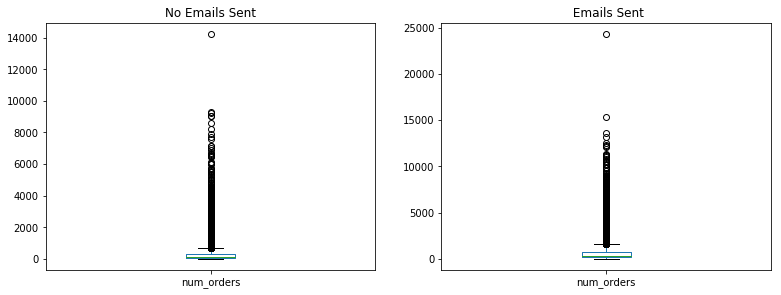

In [34]:
plt.figure(figsize=[13,10])

plt.subplot(221)
train[train.emailer_for_promotion==0]['num_orders'].plot(kind='box')
plt.title("No Emails Sent")

plt.subplot(222)
train[train.emailer_for_promotion==1]['num_orders'].plot(kind='box')
plt.title(" Emails Sent")
plt.show()

# Observations: Email promotion

1) The demand is impacted by the email promotion. when the emailer was not sent, the 25% count was 53 orders and when the emailers were sent the same count jumped up to 163 orders whic clearly states that the email promtion is viatl for the business

In [35]:

# homepage_featured
train.homepage_featured.value_counts(normalize=True)

0    0.8908
1    0.1092
Name: homepage_featured, dtype: float64

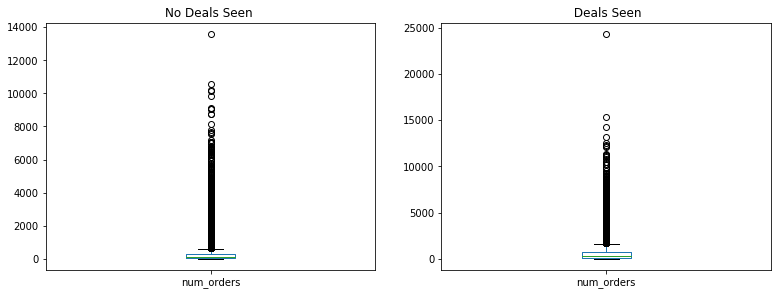

In [36]:
plt.figure(figsize=[13,10])

plt.subplot(221)
train[train.homepage_featured==0]['num_orders'].plot(kind='box')
plt.title("No Deals Seen ")

plt.subplot(222)
train[train.homepage_featured==1]['num_orders'].plot(kind='box')
plt.title(" Deals Seen")
plt.show()

In [37]:
train[train.homepage_featured==0]['num_orders'].describe()

count    406693.000000
mean        221.050040
std         290.169058
min          13.000000
25%          53.000000
50%         123.000000
75%         285.000000
max       13580.000000
Name: num_orders, dtype: float64

In [38]:

train[train.homepage_featured==1]['num_orders'].describe()

count    49855.000000
mean       594.884786
std        790.036459
min         13.000000
25%        136.000000
50%        350.000000
75%        743.000000
max      24299.000000
Name: num_orders, dtype: float64

# Observations: Homepage_featured

Max 11% of the home page featured deals are seen

Homepage ads are creating the demand and its 25% demand is  136 orders in contrast with the no homepage ads where the 25% demand is limited to 53 orders


In [39]:
# Demand Centre wise
train.center_type.value_counts(normalize=True)

TYPE_A    0.575801
TYPE_C    0.218144
TYPE_B    0.206055
Name: center_type, dtype: float64

In [0]:
# Lets find out what type of food and cuisine it serves and whether they use email promotion or not
typea=train[train.center_type=='TYPE_A']

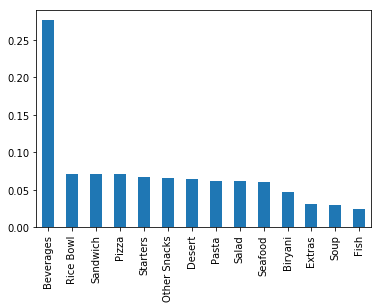

In [41]:
typea['category'].value_counts(normalize=True).plot(kind='bar')

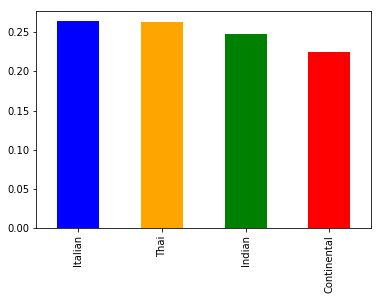

In [42]:
typea['cuisine'].value_counts(normalize=True).plot(kind='bar',color=['blue', 'orange', 'green', 'red'])

In [43]:
typea[typea.emailer_for_promotion==1]['num_orders'].describe()

count    21146.000000
mean       652.390381
std        919.992943
min         13.000000
25%        163.000000
50%        350.000000
75%        769.000000
max      24299.000000
Name: num_orders, dtype: float64

In [44]:
typea[typea.emailer_for_promotion==0]['num_orders'].describe()

count    241735.000000
mean        228.279190
std         294.637774
min          13.000000
25%          53.000000
50%         123.000000
75%         297.000000
max       14229.000000
Name: num_orders, dtype: float64

In [45]:
typea[typea.homepage_featured==0]['num_orders'].describe()

count    232483.000000
mean        218.659523
std         283.006281
min          13.000000
25%          53.000000
50%         123.000000
75%         285.000000
max       10544.000000
Name: num_orders, dtype: float64

In [46]:
typea[typea.homepage_featured==1]['num_orders'].describe()

count    30398.000000
mean       596.877920
std        809.402224
min         13.000000
25%        135.000000
50%        338.000000
75%        755.000000
max      24299.000000
Name: num_orders, dtype: float64

In [0]:
typeb=train[train.center_type=='TYPE_B']

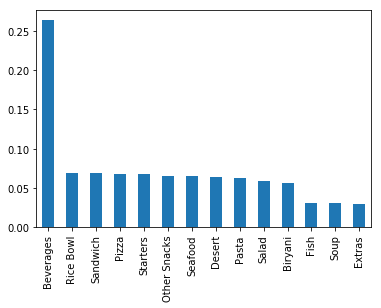

In [48]:
typeb['category'].value_counts(normalize=True).plot(kind='bar')

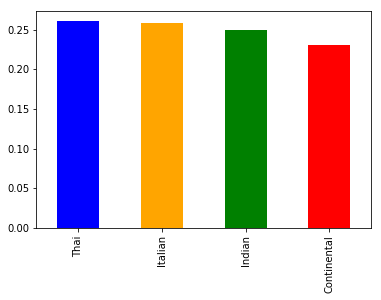

In [49]:
typeb['cuisine'].value_counts(normalize=True).plot(kind='bar',color=['blue', 'orange', 'green', 'red'])

In [50]:
typeb[typeb.emailer_for_promotion==0]['num_orders'].describe()

count    86695.000000
mean       288.721876
std        354.587708
min         13.000000
25%         68.000000
50%        163.000000
75%        365.000000
max       9044.000000
Name: num_orders, dtype: float64

In [51]:
typeb[typeb.emailer_for_promotion==1]['num_orders'].describe()

count     7379.000000
mean       672.900122
std        904.981631
min         13.000000
25%        177.000000
50%        377.000000
75%        784.000000
max      13580.000000
Name: num_orders, dtype: float64

In [52]:
typeb[typeb.homepage_featured==0]['num_orders'].describe()

count    83693.000000
mean       279.154338
std        349.960225
min         13.000000
25%         68.000000
50%        162.000000
75%        351.000000
max      13580.000000
Name: num_orders, dtype: float64

In [53]:
typeb[typeb.homepage_featured==1]['num_orders'].describe()

count    10381.000000
mean       638.937386
std        791.392623
min         13.000000
25%        175.000000
50%        391.000000
75%        797.000000
max      12327.000000
Name: num_orders, dtype: float64

In [0]:
typec=train[train.center_type=='TYPE_C']

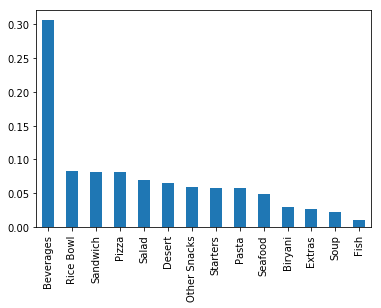

In [55]:
typec['category'].value_counts(normalize=True).plot(kind='bar')

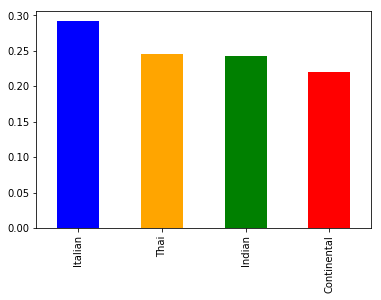

In [56]:
typec['cuisine'].value_counts(normalize=True).plot(kind='bar',color=['blue', 'orange', 'green', 'red'])

In [57]:
typec[typec.emailer_for_promotion==0]['num_orders'].describe()

count    91068.000000
mean       175.270216
std        222.732278
min         13.000000
25%         40.000000
50%         95.000000
75%        242.000000
max       6912.000000
Name: num_orders, dtype: float64

In [58]:
typec[typec.emailer_for_promotion==1]['num_orders'].describe()

count     8525.000000
mean       542.098182
std        770.773058
min         13.000000
25%        121.000000
50%        284.000000
75%        620.000000
max      10124.000000
Name: num_orders, dtype: float64

In [59]:
typec[typec.homepage_featured==0]['num_orders'].describe()

count    90517.000000
mean       173.465957
std        232.283119
min         13.000000
25%         40.000000
50%         95.000000
75%        231.000000
max       7601.000000
Name: num_orders, dtype: float64

In [60]:
typec[typec.homepage_featured==1]['num_orders'].describe()

count     9076.000000
mean       537.822499
std        715.962860
min         13.000000
25%        109.000000
50%        324.000000
75%        662.000000
max      10124.000000
Name: num_orders, dtype: float64

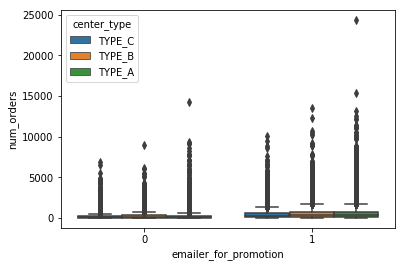

In [61]:

sns.boxplot(x=train.emailer_for_promotion, y=train.num_orders, hue=train.center_type)

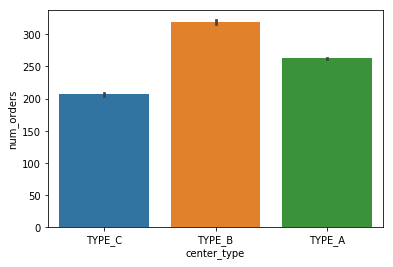

In [62]:
sns.barplot(x=train.center_type, y=train.num_orders) # This plot is plotting with the mean hence we cannot take this plot


# Observation: Centre Type

1) Type A is the most contributing centre amongst all the centre types.

2) Type B and Type C are the most dependent on the email promotion and homepage featured. This is helping the Centre to scale their business and works like a  catalysis in the growth'

3)The category and the cuisine offfered is same across all the centres.



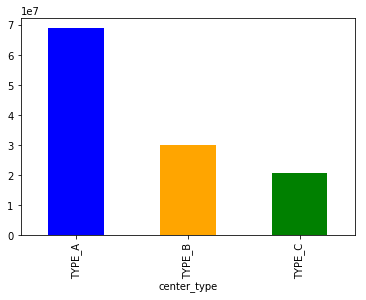

In [63]:
train.groupby(train.center_type)['num_orders'].sum().plot(kind='bar',color=['blue','orange','green'])

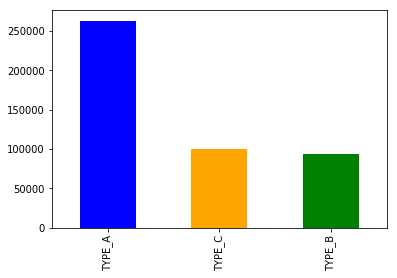

In [64]:
train[train.num_orders!=24299]['center_type'].value_counts().plot(kind='bar',color=['blue','orange','green'])

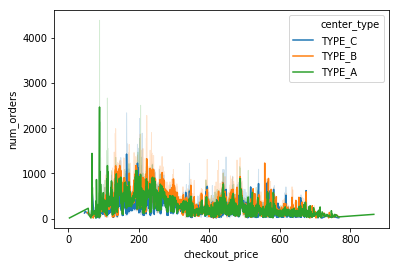

In [65]:
sns.lineplot(x=train.checkout_price,y=train.num_orders, hue=train.center_type)

# Observations: 

Out of all the centres and basic barplot,lineplot, scatter plot followed by the boxplot, the barplot gives the mean. We can also conclude that Type A nad Type B are the most contributing one for the orders


In [66]:
train.region_code.value_counts() # 8 regions and 3 centre_types

56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: region_code, dtype: int64

In [67]:
train.region_code.value_counts(normalize=True)

56    0.418856
34    0.255642
77    0.207233
85    0.066330
23    0.014093
71    0.013784
93    0.012531
35    0.011530
Name: region_code, dtype: float64

In [68]:
pd.crosstab(train.region_code,train.center_type)

center_type,TYPE_A,TYPE_B,TYPE_C
region_code,,,
23,6434,0,0
34,57407,29494,29812
35,5264,0,0
56,112218,41588,37422
71,6293,0,0
77,56592,17759,20261
85,12952,5233,12098
93,5721,0,0


Observations:-

Type A has lesser outkets where Type C and Type B doesnt exist in region codes. This means that the region code 23,35,71 and 93 are smaller regions/cities

we can make a probable column of sales with the multiplication of amount and number of orders. But here we cannot do it as the test dataset does not have any target

In [0]:

# Try to create a cluster with meal id/clusterid in relation to number of orders
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [70]:
train.op_area.describe() # Business fells int the min of 0.9 

count    456548.000000
mean          4.083590
std           1.091686
min           0.900000
25%           3.600000
50%           4.000000
75%           4.500000
max           7.000000
Name: op_area, dtype: float64

In [71]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


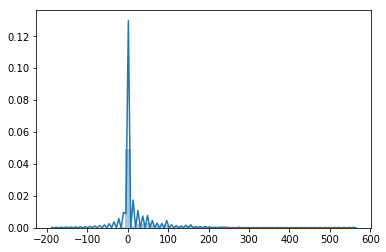

In [72]:
sns.distplot(train.base_price-train.checkout_price)
plt.show()

# Feature Engineering

In [73]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 75.7+ MB


In [74]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [0]:
train=train.drop(['id','center_id', 'meal_id'], axis=1)


In [0]:
test = test.drop(['meal_id', 'center_id'], axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
lb1 = LabelEncoder()
train['center_type'] = lb1.fit_transform(train['center_type'])

lb2 = LabelEncoder()
train['category'] = lb1.fit_transform(train['category'])

lb3 = LabelEncoder()
train['cuisine'] = lb1.fit_transform(train['cuisine'])

In [0]:
lb1 = LabelEncoder()
test['center_type'] = lb1.fit_transform(test['center_type'])

lb2 = LabelEncoder()
test['category'] = lb1.fit_transform(test['category'])

lb3 = LabelEncoder()
test['cuisine'] = lb1.fit_transform(test['cuisine'])

In [80]:
print(train.shape)

(456548, 12)


In [81]:
print(test.shape)

(32573, 12)


# Observations
 There are no null values in the dataset
 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=train.drop('num_orders',axis=1)
y=train.num_orders

In [0]:
#xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=123)

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

In [0]:
gb=GaussianNB()
rfr=RandomForestRegressor()
dtree=DecisionTreeRegressor()
bgr=BaggingRegressor()
adb=AdaBoostRegressor()
knn=KNeighborsRegressor()

In [0]:
pred=gb.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
pred1=rfr.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
pred2=dtree.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
pred3=bgr.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
pred4=adb.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
pred5=knn.fit(X,y).predict(test.drop('id',axis=1))

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred})                                    # The RMSLE score is 208.3412399500686.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/submission.csv', index=False)

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred1})                                    # The RMSLE score is 63.9499966782511.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/Random Forrest.csv', index=False)

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred2})                                    # The RMSLE score is  77.14442046726796.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/Decision Tree.csv', index=False)

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred3})                                    # The RMSLE score is   63.76057173615857.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/Bagging Regressor.csv', index=False)

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred4})                                    # The RMSLE score is   208.83782948422908.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/Ada Boost Regressor.csv', index=False)

In [0]:
 my_submission = pd.DataFrame({'id': test.id, 'num_orders': pred5})                                    # The RMSLE score is    88.00705574236535.
# # you could use any filename. We choose submission here
 my_submission.to_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Food Demand Forecasting/K Nearest Neighbors Regressor.csv', index=False)